# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up list to hold response info
city_name = []
country = []
lat = []
lon = []
date = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request for the weather data on each city
for city in cities:
# city = cities[601]

#print(f"Getting data for {city} on {date}")   

    response = requests.get(query_url + city).json()

    try:
        city_name.append(response['name'])

        country.append(response['sys']['country'])

        lat.append(response['coord']['lat'])

        lon.append(response['coord']['lon'])

        date.append(response['dt'])

        max_temp.append(response['main']['temp_max'])

        humidity.append(response['main']['humidity'])

        cloudiness.append(response['clouds']['all'])

        wind_speed.append(response['wind']['speed'])

        print(f"Getting data for {city}") 


    except KeyError: 
        print(f"Record does not exist for {city}")



Getting data for lompoc
Getting data for tasiilaq
Getting data for xucheng
Getting data for kaitangata
Getting data for jumla
Getting data for nikolskoye
Getting data for longyearbyen
Getting data for kavieng
Getting data for saint-philippe
Getting data for cherskiy
Record does not exist for taolanaro
Getting data for arraial do cabo
Getting data for pevek
Getting data for anito
Getting data for kolokani
Getting data for norman wells
Getting data for aklavik
Getting data for airai
Getting data for deer lake
Getting data for zamosc
Getting data for bengkulu
Getting data for albany
Getting data for dikson
Getting data for ushuaia
Getting data for mtinko
Record does not exist for sentyabrskiy
Getting data for graaff-reinet
Getting data for pangnirtung
Getting data for mar del plata
Getting data for hamilton
Getting data for east london
Getting data for prado
Record does not exist for attawapiskat
Getting data for hobart
Getting data for nome
Getting data for punta arenas
Getting data for 

Getting data for saint george
Getting data for amazar
Getting data for killybegs
Getting data for sorkjosen
Getting data for namtsy
Getting data for beyneu
Getting data for boysun
Getting data for iquitos
Getting data for stepnogorsk
Getting data for shingu
Getting data for haigerloch
Getting data for constitucion
Getting data for rosetown
Getting data for maumere
Getting data for mount isa
Getting data for kudahuvadhoo
Getting data for gillette
Getting data for bonthe
Getting data for kangaatsiaq
Getting data for saldanha
Getting data for kalabo
Getting data for port macquarie
Record does not exist for miranorte
Getting data for buchanan
Getting data for itoman
Record does not exist for rungata
Getting data for atar
Getting data for panalingaan
Getting data for nanakuli
Getting data for fukue
Getting data for burns lake
Getting data for yenagoa
Getting data for formosa do rio preto
Getting data for hofn
Getting data for alice springs
Getting data for maradi
Getting data for aripuana
G

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {"City": city_name, "Country": country, "Lat": lat, "Lon": lon, "Date": date, "Max Temp (cs)": max_temp, "Humidity": humidity, 
                        "Cloudiness": cloudiness, "Wind Speed (mph)": wind_speed}


weather_df = pd.DataFrame(weather_dict)
# Display the DataFrame
weather_df

,City,Country,Lat,Lon,Date,Max Temp (cs),Humidity,Cloudiness,Wind Speed (mph)
0,Lompoc,US,34.6391,-120.4579,1622659620,30.38,77,40,0.89
1,Tasiilaq,GL,65.6145,-37.6368,1622659761,5.09,82,30,2.66
2,Xucheng,CN,20.3500,110.1288,1622659761,27.39,88,94,4.67
3,Kaitangata,NZ,-46.2817,169.8464,1622659762,5.85,90,13,3.03
4,Jumla,NP,29.2747,82.1838,1622659762,12.60,84,27,1.48
5,Nikolskoye,RU,59.7035,30.7861,1622659762,16.94,75,35,2.41
6,Longyearbyen,SJ,78.2186,15.6401,1622659763,6.91,65,75,12.35
7,Kavieng,PG,-2.5744,150.7967,1622659763,27.01,79,100,2.66
8,Saint-Philippe,RE,-21.3585,55.7679,1622659613,23.77,84,97,6.94
9,Cherskiy,RU,68.7500,161.3000,1622659763,11.71,38,36,3.63


In [6]:
# Export the city data into a .csv using encoding utf-8 to avoid issues later
weather_df.to_csv("weather_data.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
print(weather_df["Humidity"].max())

100


In [8]:
#  Get the indices of cities that have humidity over 100%.
print("There are no cites with humidity higer than 100")

There are no cites with humidity higer than 100


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

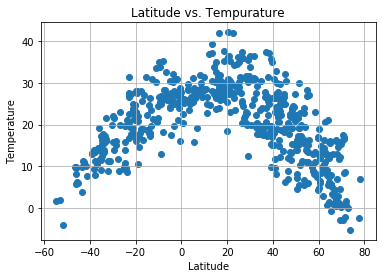

In [52]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#defining the X and Y values from Weather_DF
y_values = weather_df['Max Temp (cs)']
x_values = weather_df['Lat']

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')

#defining the axsis and title and grid
#https://stackoverflow.com/questions/8209568/how-do-i-draw-a-grid-onto-a-plot-in-python
plt.title('Latitude vs. Tempurature')
plt.ylabel('Temperature')
plt.xlabel('Latitude')
plt.grid()
plt.savefig("Lat_vs_Temp.png")
print(f'The code is analysing the relationship between city latitude and temperature.')
print(f'The closer a city is to the equator the warmer the temperature.')


## Latitude vs. Humidity Plot

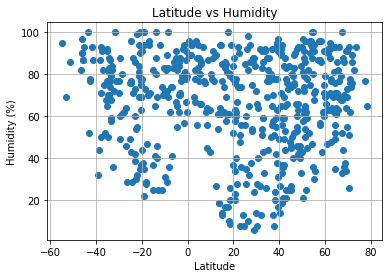

In [54]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#defining the X and Y values from Weather_DF
y_values = weather_df['Humidity']
x_values = weather_df['Lat']

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')

#defining the axsis and title and grid
#https://stackoverflow.com/questions/8209568/how-do-i-draw-a-grid-onto-a-plot-in-python
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("Lat_vs_Humid.png")
print(f'The code is analysing the relationship between city latitude and Humidity.')
print(f'No Obvious relationship present')

## Latitude vs. Cloudiness Plot

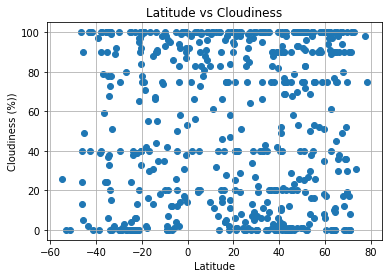

In [55]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#defining the X and Y values from Weather_DF
y_values = weather_df['Cloudiness']
x_values = weather_df['Lat']

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')

#defining the axsis and title and grid
#https://stackoverflow.com/questions/8209568/how-do-i-draw-a-grid-onto-a-plot-in-python
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.grid()
plt.savefig("Lat_vs_Cloud.png")
print(f'The code is analysing the relationship between city latitude and cloudy.')
print(f'No Obvious relationship present')

## Latitude vs. Wind Speed Plot

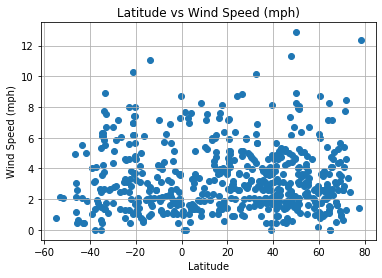

In [56]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#defining the X and Y values from Weather_DF
y_values = weather_df['Wind Speed (mph)']
x_values = weather_df['Lat']

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')

#defining the axsis and title and grid
#https://stackoverflow.com/questions/8209568/how-do-i-draw-a-grid-onto-a-plot-in-python
plt.title('Latitude vs Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Lat_vs_Wind.png")
print(f'The code is analysing the relationship between city latitude and Wind Speed.')
print(f'No Obvious relationship present')

## Linear Regression

In [26]:
#https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
#northern Hemisphere
nh = weather_df.loc[weather_df['Lat'] > 0]
nh

,City,Country,Lat,Lon,Date,Max Temp (cs),Humidity,Cloudiness,Wind Speed (mph)
0,Lompoc,US,34.6391,-120.4579,1622659620,30.38,77,40,0.89
1,Tasiilaq,GL,65.6145,-37.6368,1622659761,5.09,82,30,2.66
2,Xucheng,CN,20.3500,110.1288,1622659761,27.39,88,94,4.67
4,Jumla,NP,29.2747,82.1838,1622659762,12.60,84,27,1.48
5,Nikolskoye,RU,59.7035,30.7861,1622659762,16.94,75,35,2.41
6,Longyearbyen,SJ,78.2186,15.6401,1622659763,6.91,65,75,12.35
9,Cherskiy,RU,68.7500,161.3000,1622659763,11.71,38,36,3.63
11,Pevek,RU,69.7008,170.3133,1622659764,0.25,73,19,0.98
12,Anito,PH,12.4497,125.2886,1622659764,24.77,89,100,1.96
13,Kolokani,ML,13.5728,-8.0339,1622659765,37.02,19,100,2.33


In [27]:
#https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
#Southern Hemisphere
sh =  weather_df.loc[weather_df['Lat'] < 0]
sh

,City,Country,Lat,Lon,Date,Max Temp (cs),Humidity,Cloudiness,Wind Speed (mph)
3,Kaitangata,NZ,-46.2817,169.8464,1622659762,5.85,90,13,3.03
7,Kavieng,PG,-2.5744,150.7967,1622659763,27.01,79,100,2.66
8,Saint-Philippe,RE,-21.3585,55.7679,1622659613,23.77,84,97,6.94
10,Arraial do Cabo,BR,-22.9661,-42.0278,1622659764,26.98,73,0,4.63
16,Airai,TL,-8.9266,125.4092,1622659765,13.04,89,42,1.27
19,Bengkulu,ID,-3.8004,102.2655,1622659766,25.06,86,94,1.93
22,Ushuaia,AR,-54.8000,-68.3000,1622659512,1.79,95,26,0.74
23,Mtinko,TZ,-4.5500,34.8500,1622659767,17.43,55,50,3.13
24,Graaff-Reinet,ZA,-32.2522,24.5308,1622659767,8.84,72,2,1.09
26,Mar del Plata,AR,-38.0023,-57.5575,1622659768,13.94,50,40,1.34


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value =-0.37
The code is analysing the relationship between city latitude and temperature.
The rvaluse shows an inverse relation ship.


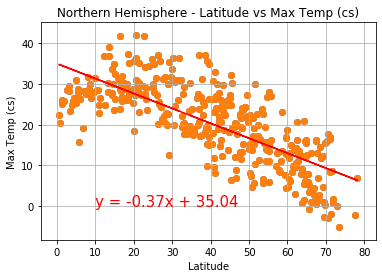

In [73]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#defining the X and Y values from Weather_DF
y_values = nh['Max Temp (cs)']
x_values = nh['Lat']

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")


#defining the axsis and title and grid
#https://stackoverflow.com/questions/8209568/how-do-i-draw-a-grid-onto-a-plot-in-python
plt.title('Northern Hemisphere - Latitude vs Max Temp (cs)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (cs)')
plt.grid()
plt.savefig("NH_Lat_vs_Temp.png")
print(f'r-value ={round(slope,2)}')
print(f'The code is analysing the relationship between city latitude and temperature.')
print(f'The rvaluse shows an inverse relation ship.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value =0.44


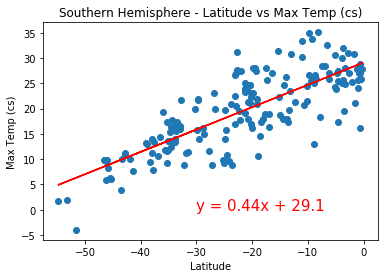

In [66]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#defining the X and Y values from Weather_DF
y_values = sh['Max Temp (cs)']
x_values = sh['Lat']

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,0),fontsize=15,color="red")

#defining the axsis and title and grid
#https://stackoverflow.com/questions/8209568/how-do-i-draw-a-grid-onto-a-plot-in-python
plt.title('Southern Hemisphere - Latitude vs Max Temp (cs)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (cs)')
plt.savefig("SH_Lat_vs_Temp.png")
print(f'r-value ={round(slope,2)}')
print(f'The code is analysing the relationship between city latitude and temperature.')
print(f'There is a positive relationship between Latitude and Temperature')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value =0.09


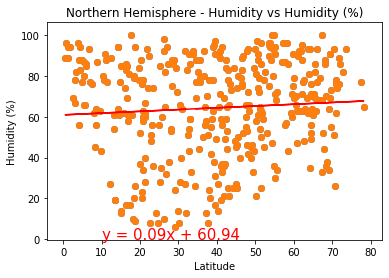

In [60]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#defining the X and Y values from Weather_DF
y_values = nh['Humidity']
x_values = nh['Lat']

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")


#defining the axsis and title and grid
#https://stackoverflow.com/questions/8209568/how-do-i-draw-a-grid-onto-a-plot-in-python
plt.title('Northern Hemisphere - Humidity vs Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("NH_Lat_vs_Humid.png")
print(f'r-value ={round(slope,2)}')
print(f'The code is analysing the relationship between city latitude and Humidity.')
print(f'There is a slight positive relationship between Latitude and Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value =-0.13


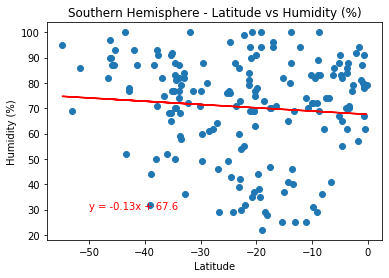

In [67]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#defining the X and Y values from Weather_DF
y_values = sh['Humidity']
x_values = sh['Lat']

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=10,color="red")

#defining the axsis and title and grid
#https://stackoverflow.com/questions/8209568/how-do-i-draw-a-grid-onto-a-plot-in-python
plt.title('Southern Hemisphere - Latitude vs Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("SH_Lat_vs_Humid.png")
print(f'r-value ={round(slope,2)}')
print(f'The code is analysing the relationship between city latitude and Humidity.')
print(f'There is a slight negative relationship between Latitude and Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value =0.0018
The code is analysing the relationship between city latitude and cloudiness.
There is a slight negative relationship between Latitude and cloudiness


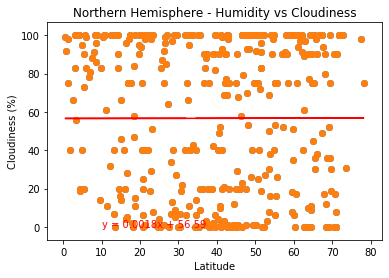

In [74]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#defining the X and Y values from Weather_DF
y_values = nh['Cloudiness']
x_values = nh['Lat']

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=10,color="red")


#defining the axsis and title and grid
#https://stackoverflow.com/questions/8209568/how-do-i-draw-a-grid-onto-a-plot-in-python
plt.title('Northern Hemisphere - Humidity vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("NH_Lat_vs_Cloud.png")
print(f'r-value ={round(slope,4)}')
print(f'The code is analysing the relationship between city latitude and cloudiness.')
print(f'There is a slight negative relationship between Latitude and cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value =0.14
The code is analysing the relationship between city latitude and cloudiness.
There is a slight positive relationship between Latitude and cloudiness


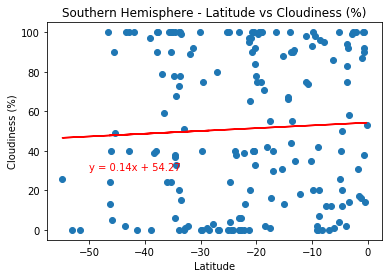

In [75]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#defining the X and Y values from Weather_DF
y_values = sh['Cloudiness']
x_values = sh['Lat']

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=10,color="red")

#defining the axsis and title and grid
#https://stackoverflow.com/questions/8209568/how-do-i-draw-a-grid-onto-a-plot-in-python
plt.title('Southern Hemisphere - Latitude vs Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("SH_Lat_vs_Cloud.png")
print(f'r-value ={round(slope,4)}')
print(f'The code is analysing the relationship between city latitude and cloudiness.')
print(f'There is a slight positive relationship between Latitude and cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value =-0.0033
The code is analysing the relationship between city latitude and Wind Speed.
There is a slight negative relationship between Latitude and Wind Speed


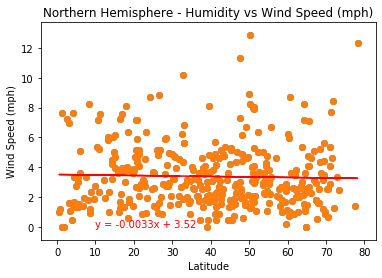

In [76]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#defining the X and Y values from Weather_DF
y_values = nh['Wind Speed (mph)']
x_values = nh['Lat']

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=10,color="red")


#defining the axsis and title and grid
#https://stackoverflow.com/questions/8209568/how-do-i-draw-a-grid-onto-a-plot-in-python
plt.title('Northern Hemisphere - Humidity vs Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("NH_Lat_vs_wind.png")
print(f'r-value ={round(slope,4)}')
print(f'The code is analysing the relationship between city latitude and Wind Speed.')
print(f'There is a slight negative relationship between Latitude and Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value =0.0045
The code is analysing the relationship between city latitude and Wind Speed.
There is a slight positive relationship between Latitude and Wind Speed


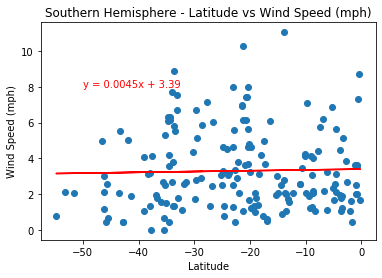

In [77]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#defining the X and Y values from Weather_DF
y_values = sh['Wind Speed (mph)']
x_values = sh['Lat']

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))

# defining the scatter plot 
plt.scatter(x_values,y_values, marker='o')

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=10,color="red")

#defining the axsis and title and grid
#https://stackoverflow.com/questions/8209568/how-do-i-draw-a-grid-onto-a-plot-in-python
plt.title('Southern Hemisphere - Latitude vs Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("SH_Lat_vs_wind.png")
print(f'r-value ={round(slope,4)}')
print(f'The code is analysing the relationship between city latitude and Wind Speed.')
print(f'There is a slight positive relationship between Latitude and Wind Speed')

In [70]:
# Observations

#1. There is little to no correlation between latitude & cloudiness, 
#latitude & wind speed and latitude & humidity.

#2. There is a strong correlation between latitude & temperature.

SyntaxError: invalid syntax (<ipython-input-70-614aaca1751f>, line 2)